<a href="https://colab.research.google.com/github/aditijainn/COGS108_Repo/blob/main/COGS108_Project_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Cleaning**

In [ ]:
# Importing libraries needed
import pandas as pd
from datetime import datetime
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
# Read in CHARLS datasets
demo = pd.read_stata('Demographic_Background.dta')
health = pd.read_stata('Health_Status_and_Functioning.dta')
cognition = pd.read_stata('Cognition.dta')

**Demographic Background Data Cleaning**

In [ ]:
# Take a look at the variables (columns) included in this dataset
demo.columns

Index(['ID', 'householdID', 'communityID', 'ba000_w2_3', 'ba001', 'ba004_w3',
       'ba004_w3_1', 'ba004_w3_2', 'ba004_w3_3', 'ba005_w4',
       ...
       'bf008', 'xrtype', 'xrgender', 'zfrgender', 'zfrzodiac', 'zfrbirth',
       'ziwtime', 'zbc004', 'zfredu', 'versionID'],
      dtype='object', length=110)

In [ ]:
# Take a look at the demo dataframe
demo.head()

,ID,householdID,communityID,ba000_w2_3,ba001,ba004_w3,ba004_w3_1,ba004_w3_2,ba004_w3_3,ba005_w4,...,bf008,xrtype,xrgender,zfrgender,zfrzodiac,zfrbirth,ziwtime,zbc004,zfredu,versionID
0,094004113002,0940041130,0940041,2 Female,6 Snake,1 Year Month Day,1954.0,1.0,31.0,2 Different,...,1 Never,1 RE Interview,2 Female,1.0,1.0,1.0,2015年07月,2 Non-agricultural Hukou,1.0,20200914
1,094004111002,0940041110,0940041,2 Female,7 Horse,1 Year Month Day,1954.0,6.0,15.0,1 Same,...,1 Never,1 RE Interview,2 Female,1.0,1.0,1.0,2015年08月,2 Non-agricultural Hukou,1.0,20200914
2,094004111001,0940041110,0940041,2 Female,7 Horse,1 Year Month Day,1954.0,6.0,15.0,1 Same,...,1 Never,1 RE Interview,2 Female,1.0,1.0,1.0,2015年08月,2 Non-agricultural Hukou,1.0,20200914
3,094004112001,0940041120,0940041,1 Male,11 Dog,1 Year Month Day,1946.0,10.0,9.0,1 Same,...,1 Never,1 RE Interview,1 Male,1.0,1.0,1.0,2015年08月,1 Agricultural Hukou,1.0,20200914
4,094004118001,0940041180,0940041,1 Male,5 Dragon,1 Year Month Day,1952.0,4.0,14.0,2 Different,...,1 Never,1 RE Interview,1 Male,1.0,1.0,1.0,2015年08月,2 Non-agricultural Hukou,1.0,20200914


In [ ]:
# Understand the size of the dataset
demo.shape

(19816, 110)

The demographics data (demo dataframe) has 19816 observations (participants) and 110 columns (information about their background).

In [ ]:
# Filter the demographic data with columns needed for calculating age
demo = demo[['ID', 'ba000_w2_3', 'ba004_w3_1', 'ba004_w3_2', 'ba004_w3_3', 'ba002_1', 'ba002_2', 'ba002_3',]]
# Rename column names to readable names based on codebook
demo.columns = ['ID', 'Gender', 'Year of Birth', 'Month of Birth', 'Day of Birth', 'Actual Year of Birth', 'Actual Month of Birth', 'Actual Day of Birth']
demo.head()

,ID,Gender,Year of Birth,Month of Birth,Day of Birth,Actual Year of Birth,Actual Month of Birth,Actual Day of Birth
0,094004113002,2 Female,1954.0,1.0,31.0,1953.0,12.0,27.0
1,094004111002,2 Female,1954.0,6.0,15.0,NaN,NaN,NaN
2,094004111001,2 Female,1954.0,6.0,15.0,NaN,NaN,NaN
3,094004112001,1 Male,1946.0,10.0,9.0,NaN,NaN,NaN
4,094004118001,1 Male,1952.0,4.0,14.0,1952.0,4.0,17.0


In [ ]:
# Replace missing birth information with actual birth data if available
def replace_actual_birth_info(df):
    df = df.copy()

    df.loc[df["Actual Year of Birth"].notna(), "Year of Birth"] = df["Actual Year of Birth"]
    df.loc[df["Actual Month of Birth"].notna(), "Month of Birth"] = df["Actual Month of Birth"]
    df.loc[df["Actual Day of Birth"].notna(), "Day of Birth"] = df["Actual Day of Birth"]

    df.drop(columns=["Actual Year of Birth", "Actual Month of Birth", "Actual Day of Birth"], inplace=True)

    return df

# Create function to calculate age from actual date of birth at time of data collection
def calculate_age(df, reference_date):
    reference_date = datetime.strptime(reference_date, "%Y-%m-%d")

    df = df.dropna(subset=["Year of Birth", "Month of Birth", "Day of Birth"]).copy()

    df.loc[:, "Year of Birth"] = df["Year of Birth"].astype(int)
    df.loc[:, "Month of Birth"] = df["Month of Birth"].astype(int)
    df.loc[:, "Day of Birth"] = df["Day of Birth"].astype(int)

    df.loc[:, "Age"] = df.apply(lambda row: reference_date.year - row["Year of Birth"] -
                                  ((reference_date.month, reference_date.day) < (row["Month of Birth"], row["Day of Birth"])), axis=1)
    return df

In [ ]:
# Apply demo dataframe to get actual date of birth
demo = replace_actual_birth_info(demo)

# Apply demo dataframe and the date of data collection to calculate age
demo = calculate_age(demo, "2018-10-01")

In [ ]:
# Take a look at the demo dataframe after filtering
demo.head()

,ID,Gender,Year of Birth,Month of Birth,Day of Birth,Age
0,094004113002,2 Female,1953.0,12.0,27.0,64.0
1,094004111002,2 Female,1954.0,6.0,15.0,64.0
2,094004111001,2 Female,1954.0,6.0,15.0,64.0
3,094004112001,1 Male,1946.0,10.0,9.0,71.0
4,094004118001,1 Male,1952.0,4.0,17.0,66.0


In [ ]:
# Understand the size of the dataset after filtering
demo.shape

(19814, 6)

After filtering, the demographics data (demo dataframe) has 19814 observations (participants) and 6 columns (information about their background).

**Health Status and Functioning Data Cleaning**

In [ ]:
# Take a look at the variables (columns) included in this dataset
health.columns

Index(['ID', 'householdID', 'communityID', 'da002', 'da002_w2_1', 'da005_1_',
       'da005_2_', 'da005_3_', 'da005_4_', 'da005_5_',
       ...
       'zcataract', 'zcataractnum', 'zglaucoma', 'ztooth', 'zsmoke', 'zda065',
       'zda069', 'zda070', 'zda071', 'versionID'],
      dtype='object', length=896)

In [ ]:
# Understand the size of the dataset
health.shape

(19752, 896)

In [ ]:
# Take a look at the health dataframe
health.head()

,ID,householdID,communityID,da002,da002_w2_1,da005_1_,da005_2_,da005_3_,da005_4_,da005_5_,...,zcataract,zcataractnum,zglaucoma,ztooth,zsmoke,zda065,zda069,zda070,zda071,versionID
0,094004113002,0940041130,0940041,1 Very Good,2 About The Same,2 No,2 No,2 No,2 No,2 No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200914
1,094004111002,0940041110,0940041,4 Poor,2 About The Same,2 No,2 No,2 No,2 No,2 No,...,NaN,NaN,NaN,NaN,NaN,1 Yes,2 Less than Once a Month,NaN,NaN,20200914
2,094004111001,0940041110,0940041,4 Poor,2 About The Same,2 No,2 No,2 No,2 No,2 No,...,NaN,NaN,NaN,NaN,NaN,NaN,1 Never,NaN,NaN,20200914
3,094004112001,0940041120,0940041,1 Very Good,2 About The Same,NaN,2 No,NaN,2 No,2 No,...,1 Yes,2 Two Eyes,1 Yes,NaN,NaN,NaN,1 Never,NaN,NaN,20200914
4,094004118001,0940041180,0940041,5 Very Poor,3 Worse,NaN,2 No,2 No,2 No,2 No,...,NaN,NaN,NaN,NaN,1 Yes,1 Yes,1 Never,NaN,NaN,20200914


In [ ]:
# Filter the health data with columns regarding sleep duration
health = health[['ID', 'da049', 'da050']]
# Rename column names to readable names based on codebook
health.columns = ['ID', 'During Last Month Average Hours of Actual Sleep', 'During Last Month Time for a Nap after Lunch']

In [ ]:
# Take a look at the health dataframe after filtering
health.head()

,ID,During Last Month Average Hours of Actual Sleep,During Last Month Time for a Nap after Lunch
0,094004113002,8.0,120.0
1,094004111002,5.0,60.0
2,094004111001,5.0,60.0
3,094004112001,8.0,20.0
4,094004118001,8.0,0.0


In [ ]:
# Understand the size of the dataset after filtering
health.shape

(19752, 3)

The health status and functioning data (demo dataframe) has 19752 observations (participants) and 3 columns (information about their identity and sleep duration).

**Cognition Cleaning**

In [ ]:
# Take a look at the variables (columns) included in this dataset
cognition.columns

Index(['ID', 'householdID', 'communityID', 'dc001_w4', 'dc002_w4', 'dc003_w4',
       'dc005_w4', 'dc006_w4', 'dc007_w4', 'dc008_w4',
       ...
       'dc068_w4_s2', 'dc068_w4_s3', 'dc068_w4_s4', 'dc068_w4_s5',
       'dc068_w4_s6', 'dc068_w4_s7', 'dc068_w4_s8', 'dc069_w4', 'dc070_w4',
       'versionID'],
      dtype='object', length=219)

In [ ]:
# Take a look at the cognition dataframe
cognition.head()

,ID,householdID,communityID,dc001_w4,dc002_w4,dc003_w4,dc005_w4,dc006_w4,dc007_w4,dc008_w4,...,dc068_w4_s2,dc068_w4_s3,dc068_w4_s4,dc068_w4_s5,dc068_w4_s6,dc068_w4_s7,dc068_w4_s8,dc069_w4,dc070_w4,versionID
0,094004113002,0940041130,0940041,1 Correct,1 Correct,5 Error,1 Correct,1 Correct,1 Correct,1 Correct,...,0 No,0 No,0 No,0 No,0 No,0 No,8 None of the above,1 Mandarin,2 No,20200914
1,094004111002,0940041110,0940041,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,...,0 No,0 No,0 No,0 No,0 No,0 No,8 None of the above,1 Mandarin,2 No,20200914
2,094004111001,0940041110,0940041,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,...,0 No,0 No,0 No,0 No,0 No,0 No,8 None of the above,1 Mandarin,2 No,20200914
3,094004112001,0940041120,0940041,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,1 Correct,...,0 No,0 No,0 No,0 No,0 No,0 No,8 None of the above,1 Mandarin,2 No,20200914
4,094004118001,0940041180,0940041,1 Correct,1 Correct,5 Error,1 Correct,1 Correct,1 Correct,1 Correct,...,0 No,0 No,0 No,0 No,0 No,0 No,8 None of the above,1 Mandarin,2 No,20200914


In [ ]:
# Understand the size of the dataset
cognition.shape

(19744, 219)

Since there are 219 columns within the cognition dataframe, we want to keep only the ones that are most useful by cleaning it.

In [ ]:
# First, calculate the percentage of missing data for each column in the 'cognition' dataset
# This gives us a series where the index is the column name and the value is the percentage of missing data
missing_percentage = cognition.isna().sum() / len(cognition) * 100

# Print the number of columns that have missing values
print(missing_percentage.count())

219


In [ ]:
# Sort the missing percentage values in descending order so that columns with more missing data appear first
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Filter out columns where more than 0% of the data is missing and print them
missing_filtered = missing_percentage_sorted[missing_percentage_sorted > 0]
pd.set_option('display.max_rows', None) # displaying all rows
print(missing_filtered)

dc032_w4_1          99.777147
dc032_w4_2          99.731564
dc032_w4_3          99.604943
dc033_w4_1          99.549230
dc031_w4_1          99.473258
dc032_w3_3          99.027553
dc035_w4_3          98.997164
dc035_w4_1          98.900932
dc032_w3_2          98.900932
dc035_w4_2          98.880673
dc032_w3_1          98.855348
dc033_w4_3          98.470421
dc014_w4_5          98.136143
dc014_w4_4          97.999392
dc033_w4_2          97.457455
dc031_w4_2          97.118112
dc014_w4_3          96.809157
dc013_w4_5_s2       94.757901
dc013_w4_5_s97      94.757901
dc013_w4_5_s4       94.757901
dc013_w4_5_s1       94.757901
dc013_w4_5_s3       94.757901
dc013_w4_4_s1       93.040924
dc013_w4_4_s4       93.040924
dc013_w4_4_s97      93.040924
dc013_w4_4_s2       93.040924
dc013_w4_4_s3       93.040924
dc034_w4_2          92.883914
dc014_w4_2          92.022893
dc039_w4_1          91.582253
dc034_w4_3          91.470827
dc028_w4_1          90.827593
dc034_w4_1          90.599676
dc035_w3_2

In [ ]:
# Print the remaining columns that doesn't have missing values
print("Remaining columns:", cognition.dropna(axis=1).columns.tolist())

Remaining columns: ['ID', 'householdID', 'communityID', 'versionID']


In [ ]:
# Based on the filtered 'missing_filtered' output, manually select and filter the columns that have less than 10% missing data
# These are the columns that we want to keep in the cleaned dataset
columns_to_filter = [
    "ID", "householdID", "communityID", "versionID", "dc070_w4", "dc069_w4", "dc068_w4_s2", "dc068_w4_s5", "dc068_w4_s7", "dc068_w4_s8",
    "dc068_w4_s1", "dc068_w4_s6", "dc068_w4_s3", "dc068_w4_s4", "dc015", "dc046_w4",
    "dc016", "dc014", "dc018", "dc028", "dc042_w3", "dc043_w3", "dc044_w3", "dc013",
    "dc012", "dc011", "dc017", "dc009", "dc024_w4", "dc010", "wr101_intro", "dc004",
    "dc002_w4", "dc003_w4", "dc005_w4", "dc006_w4", "dc001_w4",
    "dc029_w3_1", "dc030_w3_1", "dc030_w4_s1", "dc030_w4_s11", "dc030_w4_s12",
    "dc030_w4_s2", "dc030_w4_s8", "dc030_w4_s10", "dc030_w4_s3", "dc030_w4_s9",
    "dc030_w4_s7", "dc030_w4_s6", "dc030_w4_s5", "dc030_w4_s4", "dc047_w4_s1",
    "dc047_w4_s2", "dc047_w4_s3", "dc047_w4_s5", "dc047_w4_s6", "dc047_w4_s7",
    "dc047_w4_s8", "dc047_w4_s9", "dc047_w4_s10", "dc047_w4_s11", "dc047_w4_s12",
    "dc047_w4_s4", "dc029_w4_s2", "dc029_w4_s12", "dc029_w4_s11", "dc029_w4_s10",
    "dc029_w4_s9", "dc029_w4_s8", "dc029_w4_s7", "dc029_w4_s6", "dc029_w4_s5",
    "dc029_w4_s4", "dc029_w4_s3", "dc029_w4_s1", "dc031_w4_s4", "dc031_w4_s2",
    "dc031_w4_s3", "dc031_w4_s1", "dc028_w4_s8", "dc028_w4_s1", "dc028_w4_s2",
    "dc028_w4_s3", "dc028_w4_s4", "dc028_w4_s5", "dc028_w4_s6", "dc028_w4_s7",
    "dc028_w4_s9", "dc028_w4_s10", "dc028_w4_s11", "dc028_w4_s12", "dc031_w4_0"
]
cognition_filtered = cognition[columns_to_filter]
print("New shape of cognition table:", cognition_filtered.shape)

New shape of cognition table: (19744, 92)


**Merging and Cleaning of Final Dataset**

There is a discrepancy between the shapes of demo, health, and cognition. We have to merge the datasets and delete the ID's that do not match up.

In [ ]:
# Merge the 'demo', 'health', and 'cognition_filtered' datasets on the 'ID' column using inner join
# This ensures that only rows with matching 'ID's across all three datasets are included
df = demo.merge(health, on='ID', how='inner').merge(cognition_filtered, on='ID', how='inner')

In [ ]:
# Take a look at the merged dataframe
df.head()

,ID,Gender,Year of Birth,Month of Birth,Day of Birth,Age,During Last Month Average Hours of Actual Sleep,During Last Month Time for a Nap after Lunch,householdID,communityID,...,dc028_w4_s3,dc028_w4_s4,dc028_w4_s5,dc028_w4_s6,dc028_w4_s7,dc028_w4_s9,dc028_w4_s10,dc028_w4_s11,dc028_w4_s12,dc031_w4_0
0,094004113002,2 Female,1953.0,12.0,27.0,64.0,8.0,120.0,0940041130,0940041,...,0 No,0 No,0 No,0 No,7 Pole,9 Grass,10 Engine,0 No,0 No,1 Continue
1,094004111002,2 Female,1954.0,6.0,15.0,64.0,5.0,60.0,0940041110,0940041,...,0 No,0 No,0 No,6 Cabin,0 No,9 Grass,10 Engine,0 No,0 No,1 Continue
2,094004111001,2 Female,1954.0,6.0,15.0,64.0,5.0,60.0,0940041110,0940041,...,0 No,0 No,0 No,6 Cabin,0 No,9 Grass,10 Engine,0 No,0 No,1 Continue
3,094004112001,1 Male,1946.0,10.0,9.0,71.0,8.0,20.0,0940041120,0940041,...,0 No,0 No,0 No,6 Cabin,7 Pole,9 Grass,10 Engine,0 No,0 No,NaN
4,094004118001,1 Male,1952.0,4.0,17.0,66.0,8.0,0.0,0940041180,0940041,...,0 No,0 No,0 No,0 No,0 No,9 Grass,0 No,0 No,0 No,1 Continue


In [ ]:
# Understand the size of the merged dataframe
df.shape

(19715, 99)

In [ ]:
# Drop rows with missing values in specific columns that are crucial for analysis (nap time and sleep hours)
df = df.dropna(subset = ["During Last Month Time for a Nap after Lunch", "During Last Month Average Hours of Actual Sleep"])
print(df.shape)

(19709, 99)


In [ ]:
# Check if there are any remaining columns with missing values (NaNs) after the previous steps
print(df.isna().sum()[df.isna().sum() > 0])

dc070_w4        1582
dc069_w4        1581
dc068_w4_s2     1580
dc068_w4_s5     1580
dc068_w4_s7     1580
dc068_w4_s8     1580
dc068_w4_s1     1580
dc068_w4_s6     1580
dc068_w4_s3     1580
dc068_w4_s4     1580
dc015           1579
dc046_w4        1579
dc016           1579
dc014           1579
dc018           1579
dc028           1579
dc042_w3        1579
dc043_w3        1579
dc044_w3        1579
dc013           1579
dc012           1579
dc011           1579
dc017           1579
dc009           1578
dc024_w4        1578
dc010           1578
wr101_intro     1578
dc004           1576
dc002_w4        1575
dc003_w4        1575
dc005_w4        1575
dc006_w4        1575
dc001_w4        1573
dc029_w3_1      5144
dc030_w3_1      4732
dc030_w4_s1     4614
dc030_w4_s11    4614
dc030_w4_s12    4614
dc030_w4_s2     4614
dc030_w4_s8     4614
dc030_w4_s10    4614
dc030_w4_s3     4614
dc030_w4_s9     4614
dc030_w4_s7     4614
dc030_w4_s6     4614
dc030_w4_s5     4614
dc030_w4_s4     4614
dc047_w4_s1  

In [ ]:
# List of columns with NaN values that need to be removed
columns_with_nans = [
    "dc070_w4", "dc069_w4", "dc068_w4_s2", "dc068_w4_s5", "dc068_w4_s7", "dc068_w4_s8",
    "dc068_w4_s1", "dc068_w4_s6", "dc068_w4_s3", "dc068_w4_s4", "dc015", "dc046_w4",
    "dc016", "dc014", "dc018", "dc028", "dc042_w3", "dc043_w3", "dc044_w3", "dc013",
    "dc012", "dc011", "dc017", "dc009", "dc024_w4", "dc010", "wr101_intro", "dc004",
    "dc002_w4", "dc003_w4", "dc005_w4", "dc006_w4", "dc001_w4",
    "dc029_w3_1", "dc030_w3_1", "dc030_w4_s1", "dc030_w4_s11", "dc030_w4_s12",
    "dc030_w4_s2", "dc030_w4_s8", "dc030_w4_s10", "dc030_w4_s3", "dc030_w4_s9",
    "dc030_w4_s7", "dc030_w4_s6", "dc030_w4_s5", "dc030_w4_s4", "dc047_w4_s1",
    "dc047_w4_s2", "dc047_w4_s3", "dc047_w4_s5", "dc047_w4_s6", "dc047_w4_s7",
    "dc047_w4_s8", "dc047_w4_s9", "dc047_w4_s10", "dc047_w4_s11", "dc047_w4_s12",
    "dc047_w4_s4", "dc029_w4_s2", "dc029_w4_s12", "dc029_w4_s11", "dc029_w4_s10",
    "dc029_w4_s9", "dc029_w4_s8", "dc029_w4_s7", "dc029_w4_s6", "dc029_w4_s5",
    "dc029_w4_s4", "dc029_w4_s3", "dc029_w4_s1", "dc031_w4_s4", "dc031_w4_s2",
    "dc031_w4_s3", "dc031_w4_s1", "dc028_w4_s8", "dc028_w4_s1", "dc028_w4_s2",
    "dc028_w4_s3", "dc028_w4_s4", "dc028_w4_s5", "dc028_w4_s6", "dc028_w4_s7",
    "dc028_w4_s9", "dc028_w4_s10", "dc028_w4_s11", "dc028_w4_s12", "dc031_w4_0"
]

# Remove rows from the dataframe that contains NaN
df_cleaned = df.dropna(subset=columns_with_nans)

# Understand the new size of the merged dataframe
print("New shape after removing rows with NaNs:", df_cleaned.shape)

# Check if there are any remaining columns with missing values (NaNs) after cleaning the dataframe
print(df_cleaned.isna().sum()[df_cleaned.isna().sum() > 0])

New shape after removing rows with NaNs: (12957, 99)
Series([], dtype: int64)


As shown above, there are no remaining columns with missing values.

In [ ]:
# Create a dictionary mapping old column names to readable names based on codebook
column_name_mapping = {
    "dc070_w4": "Using Translator during Interview",
    "dc069_w4": "Language Used by Interviewers",
    "dc068_w4_s2": "Things Happened during Respondent Interview 2",
    "dc068_w4_s5": "Things Happened during Respondent Interview 5",
    "dc068_w4_s7": "Things Happened during Respondent Interview 7",
    "dc068_w4_s8": "Things Happened during Respondent Interview 8",
    "dc068_w4_s1": "Things Happened during Respondent Interview 1",
    "dc068_w4_s6": "Things Happened during Respondent Interview 6",
    "dc068_w4_s3": "Things Happened during Respondent Interview 3",
    "dc068_w4_s4": "Things Happened during Respondent Interview 4",
    "dc015": "Delayed Recall: Ball Flag Tree",
    "dc046_w4": "Air Quality Satisfication",
    "dc016": "I Was Happy",
    "dc014": "I Felt Fearful",
    "dc018": "I Could Not Get on",
    "dc028": "Life Satisfication",
    "dc042_w3": "Health Satisfication",
    "dc043_w3": "Marriage Satisfication",
    "dc044_w3": "Chidren Satisfication",
    "dc013": "I Felt Hopeful about the Future",
    "dc012": "I Felt Everything I Did Was An Effort",
    "dc011": "Felt Depressed",
    "dc017": "I Felt Lonely",
    "dc009": "Bothered by Things",
    "dc024_w4": "Draw Correct",
    "dc010": "Had Trouble Keeping Mind",
    "wr101_intro": "Understand and Accept WR Test",
    "dc004": "Self-Rated Memory",
    "dc002_w4": "Checking Season",
    "dc003_w4": "Checking Date",
    "dc005_w4": "Checking Day",
    "dc006_w4": "Checking Month",
    "dc001_w4": "Checking Year",
    "dc029_w3_1": "Answer of Example 1",
    "dc030_w3_1": "Answer of Example 2",
    "dc030_w4_s1": "Word Recall 3rd: Shore",
    "dc030_w4_s11": "Word Recall 3rd: None",
    "dc030_w4_s12": "Word Recall 3rd: Refused to Recall",
    "dc030_w4_s2": "Word Recall 3rd: Letter",
    "dc030_w4_s8": "Word Recall 3rd: Grass",
    "dc030_w4_s10": "Word Recall 3rd: Queen",
    "dc030_w4_s3": "Word Recall 3rd: Arm",
    "dc030_w4_s9": "Word Recall 3rd: Butter",
    "dc030_w4_s7": "Word Recall 3rd: Engine",
    "dc030_w4_s6": "Word Recall 3rd: Ticket",
    "dc030_w4_s5": "Word Recall 3rd: Pole",
    "dc030_w4_s4": "Word Recall 3rd: Cabin",
    "dc047_w4_s1": "Delayed Recall: Shore",
    "dc047_w4_s2": "Delayed Recall: Letter",
    "dc047_w4_s3": "Delayed Recall: Arm",
    "dc047_w4_s5": "Delayed Recall: Pole",
    "dc047_w4_s6": "Delayed Recall: Ticket",
    "dc047_w4_s7": "Delayed Recall: Engine",
    "dc047_w4_s8": "Delayed Recall: Grass",
    "dc047_w4_s9": "Delayed Recall: Butter",
    "dc047_w4_s10": "Delayed Recall: Queen",
    "dc047_w4_s11": "Delayed Recall: None",
    "dc047_w4_s12": "Delayed Recall: Refused to Recall",
    "dc047_w4_s4": "Delayed Recall: Cabin",
    "dc029_w4_s2": "Word Recall 2nd: Letter",
    "dc029_w4_s12": "Word Recall 2nd: Refused to Recall",
    "dc029_w4_s11": "Word Recall 2nd: None",
    "dc029_w4_s10": "Word Recall 2nd: Engine",
    "dc029_w4_s9": "Word Recall 2nd: Ticket",
    "dc029_w4_s8": "Word Recall 2nd: Cabin",
    "dc029_w4_s7": "Word Recall 2nd: Grass",
    "dc029_w4_s6": "Word Recall 2nd: Shore",
    "dc029_w4_s5": "Word Recall 2nd: Arm",
    "dc029_w4_s4": "Word Recall 2nd: Queen",
    "dc029_w4_s3": "Word Recall 2nd: Butter",
    "dc029_w4_s1": "Word Recall 2nd: Pole",
    "dc031_w4_s4": "Whether any of the Following Apply: None of the above",
    "dc031_w4_s2": "Whether any of the Following Apply: Interruption Occured during Administration",
    "dc031_w4_s3": "Whether any of the Following Apply: Respondent Had Difficulty Reading the Words",
    "dc031_w4_s1": "Whether any of the Following Apply: Administered Verbally",
    "dc028_w4_s8": "Word Recall 1st: Ticket",
    "dc028_w4_s1": "Word Recall 1st: Butter",
    "dc028_w4_s2": "Word Recall 1st: Arm",
    "dc028_w4_s3": "Word Recall 1st: Shore",
    "dc028_w4_s4": "Word Recall 1st: Letter",
    "dc028_w4_s5": "Word Recall 1st: Queen",
    "dc028_w4_s6": "Word Recall 1st: Cabin",
    "dc028_w4_s7": "Word Recall 1st: Pole",
    "dc028_w4_s9": "Word Recall 1st: Grass",
    "dc028_w4_s10": "Word Recall 1st: Engine",
    "dc028_w4_s11": "Word Recall 1st: None",
    "dc028_w4_s12": "Word Recall 1st: Refused to Recall",
    "dc031_w4_0": "Understand This Test or Not"
}

# Rename columns in the cleaned, merged dataframe based on above mapping
df_final = df_cleaned.rename(columns=column_name_mapping)

# Display the updated column names
print("Updated column names:")
print(df_final.columns)

Updated column names:
Index(['ID', 'Gender', 'Year of Birth', 'Month of Birth', 'Day of Birth',
       'Age', 'During Last Month Average Hours of Actual Sleep',
       'During Last Month Time for a Nap after Lunch', 'householdID',
       'communityID', 'versionID', 'Using Translator during Interview',
       'Language Used by Interviewers',
       'Things Happened during Respondent Interview 2',
       'Things Happened during Respondent Interview 5',
       'Things Happened during Respondent Interview 7',
       'Things Happened during Respondent Interview 8',
       'Things Happened during Respondent Interview 1',
       'Things Happened during Respondent Interview 6',
       'Things Happened during Respondent Interview 3',
       'Things Happened during Respondent Interview 4',
       'Delayed Recall: Ball Flag Tree', 'Air Quality Satisfication',
       'I Was Happy', 'I Felt Fearful', 'I Could Not Get on',
       'Life Satisfication', 'Health Satisfication', 'Marriage Satisfication'

# Results

### **Exploratory Data Analysis**

In [ ]:
# Take a look at the stats of the data
df_final.describe()

,Year of Birth,Month of Birth,Day of Birth,Age,During Last Month Average Hours of Actual Sleep,During Last Month Time for a Nap after Lunch,Answer of Example 1,Answer of Example 2
count,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000,12957.000000
mean,1958.117929,6.630084,14.794628,59.616192,6.247098,40.569721,6.016902,5.086555
std,9.340295,3.527578,8.618338,9.339768,1.790069,48.364540,1.017419,1.254179
min,1910.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,1951.000000,3.000000,7.000000,52.000000,5.000000,0.000000,6.000000,5.000000
50%,1959.000000,7.000000,15.000000,59.000000,6.000000,30.000000,6.000000,5.000000
75%,1966.000000,10.000000,22.000000,66.000000,7.500000,60.000000,6.000000,5.000000
max,1998.000000,12.000000,31.000000,108.000000,20.000000,900.000000,75.000000,72.000000


The dataset gives us a snapshot of sleep and cognitive patterns in an aging population. On average, participants are about 60 years old, but their ages range from 19 to 108. Most people get around 6.25 hours of sleep per night, though some report getting none at all, while others claim up to 20 hours, which could indicate data entry errors or unique cases. Cognitive test scores seem fairly consistent across the group, averaging around 5-6, suggesting stable performance levels with some natural variation.

# Setup

We want to first calculate a memory score for each participant based on their recall test results. The recall tests are based on the CERAD Memory Tests which assess short-term memory and delayed recall. We will examine this relationship with their sleep duration.

In [ ]:
def process_word_recall(df, recall_columns, recall_label):
    """
    Process word recall columns to generate binary columns and calculate the total score for each participant.
    """
    # Runs through every column and turns the value into binary '0' if the word 'No' is present in that index and column
    for col in recall_columns:
        if col in df.columns:
            df[f"{col} Binary"] = df[col].apply(lambda x: 0 if isinstance(x, str) and 'No' in x else 1)
    binary_columns = [f"{col} Binary" for col in recall_columns]
    valid_binary_columns = [col for col in binary_columns if col in df.columns]
    df[f"Total {recall_label} Recall Score"] = df[valid_binary_columns].sum(axis=1)
    return df

# Four sets of columns to test
word_recall_first_columns = [
    'Word Recall 1st: Ticket', 'Word Recall 1st: Butter',
    'Word Recall 1st: Arm', 'Word Recall 1st: Shore',
    'Word Recall 1st: Letter', 'Word Recall 1st: Queen',
    'Word Recall 1st: Cabin', 'Word Recall 1st: Pole',
    'Word Recall 1st: Grass', 'Word Recall 1st: Engine',
    'Word Recall 1st: None', 'Word Recall 1st: Refused to Recall']

word_recall_second_columns = [
    'Word Recall 2nd: Letter', 'Word Recall 2nd: Refused to Recall',
    'Word Recall 2nd: None', 'Word Recall 2nd: Engine',
    'Word Recall 2nd: Ticket', 'Word Recall 2nd: Cabin',
    'Word Recall 2nd: Grass', 'Word Recall 2nd: Shore',
    'Word Recall 2nd: Arm', 'Word Recall 2nd: Queen',
    'Word Recall 2nd: Butter', 'Word Recall 2nd: Pole']

word_recall_third_columns = [
    'Word Recall 3rd: Shore', 'Word Recall 3rd: None', 'Word Recall 3rd: Refused to Recall',
    'Word Recall 3rd: Letter', 'Word Recall 3rd: Grass', 'Word Recall 3rd: Queen',
    'Word Recall 3rd: Arm', 'Word Recall 3rd: Butter', 'Word Recall 3rd: Engine',
    'Word Recall 3rd: Ticket', 'Word Recall 3rd: Pole', 'Word Recall 3rd: Cabin']

word_recall_delayed_columns = [
    'Delayed Recall: Shore', 'Delayed Recall: Letter', 'Delayed Recall: Arm',
    'Delayed Recall: Pole', 'Delayed Recall: Ticket', 'Delayed Recall: Engine',
    'Delayed Recall: Grass', 'Delayed Recall: Butter', 'Delayed Recall: Queen',
    'Delayed Recall: None', 'Delayed Recall: Refused to Recall', 'Delayed Recall: Cabin']

df_final = process_word_recall(df_final, word_recall_first_columns, "1st")
df_final = process_word_recall(df_final, word_recall_second_columns, "2nd")
df_final = process_word_recall(df_final, word_recall_third_columns, "3rd")
df_final = process_word_recall(df_final, word_recall_delayed_columns, "Delayed")
df_final[['ID', "Total 1st Recall Score", "Total 2nd Recall Score", "Total 3rd Recall Score", "Total Delayed Recall Score"]].head()

,ID,Total 1st Recall Score,Total 2nd Recall Score,Total 3rd Recall Score,Total Delayed Recall Score
0,094004113002,3,7,8,8
1,094004111002,5,6,7,4
2,094004111001,5,6,7,4
4,094004118001,3,4,6,6
5,094004118002,9,10,10,10


In [ ]:
# Sum each person's recall scores and produce a new column for each test
df_final["Summed Recall Score"] = df_final[[
    "Total 1st Recall Score",
    "Total 2nd Recall Score",
    "Total 3rd Recall Score",
    "Total Delayed Recall Score"
]].sum(axis=1)
df_final[['ID', "Summed Recall Score"]].head()

,ID,Summed Recall Score
0,094004113002,26
1,094004111002,22
2,094004111001,22
4,094004118001,19
5,094004118002,39


Next, we will create age groups (starting at 45, with a 10-year age range), and group data by age.

In [ ]:
# Create the age groups
age_bins = list(range(45, int(df_final['Age'].max()) + 10, 10))
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
df_final['Age Group'] = pd.cut(df_final['Age'], bins=age_bins, labels=age_labels, right=False)

Finally, we will create another measure of cognition using the checking date and time data.

In [ ]:
# Create the cognition groups
import numpy as np
# print(df_final['Checking Season'].unique())
# If row contains 'Not Assessed', replace it with 'nan'. If row contains
# 'Correct', replace it with 1. Else replace row with 0.
# df_final['Checking Season Binary'] = df_final['Checking Season'].apply(
    # lambda x: 1 if isinstance(x, str) and 'Correct' in x else (0 if isinstance(x, str) and 'Error' in x else np.nan)
# )
# print(df_final['Checking Season Binary'].unique())

cognition_columns = ['Checking Season', 'Checking Date', 'Checking Day', 'Checking Month', 'Checking Year']
for col in cognition_columns:
    binary_col_name = f"{col} Binary"  # New column for the binary data
    df_final[binary_col_name] = df_final[col].apply(
        lambda x: 1 if isinstance(x, str) and 'Correct' in x else (0 if isinstance(x, str) and 'Error' in x else np.nan)
    )
binary_columns = [f"{col} Binary" for col in cognition_columns]
df_final['Cognition Score'] = df_final[binary_columns].sum(axis=1)

# Distribution of Variables

First, let's check the distribution of the main variables:

1. Age
2. During Last Month Average Hours of Actual Sleep
3. Summed Recall Score
4. Cognition Score

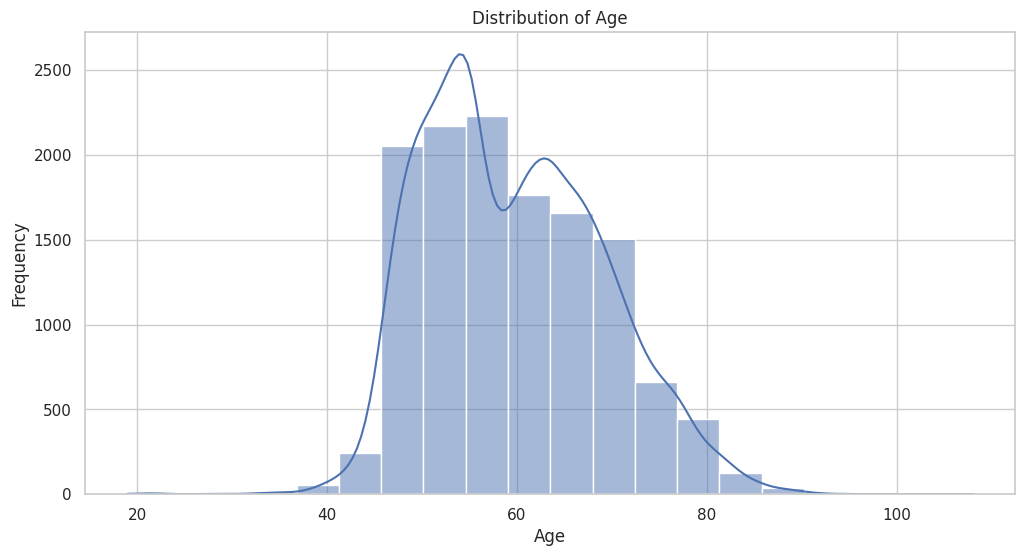

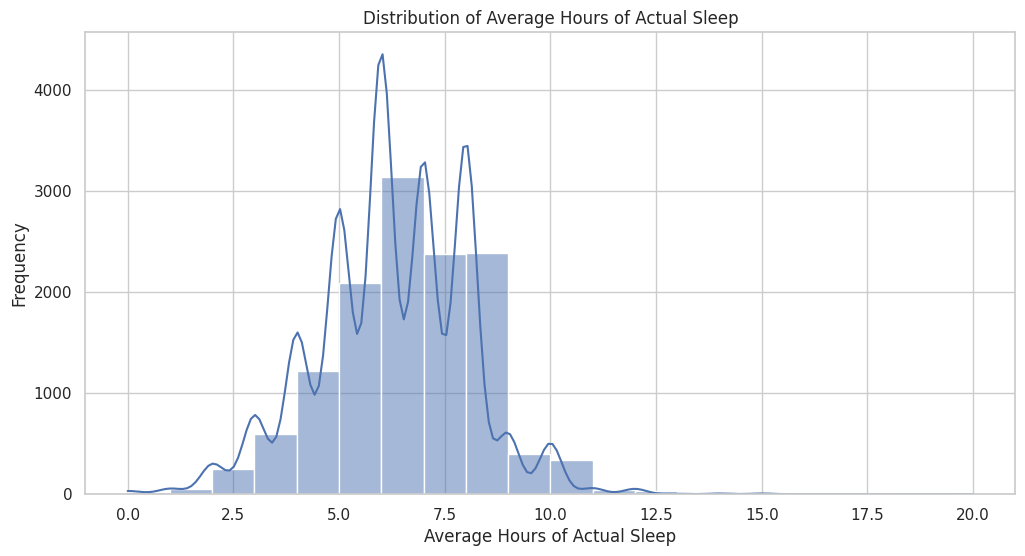

Text(0, 0.5, 'Frequency')

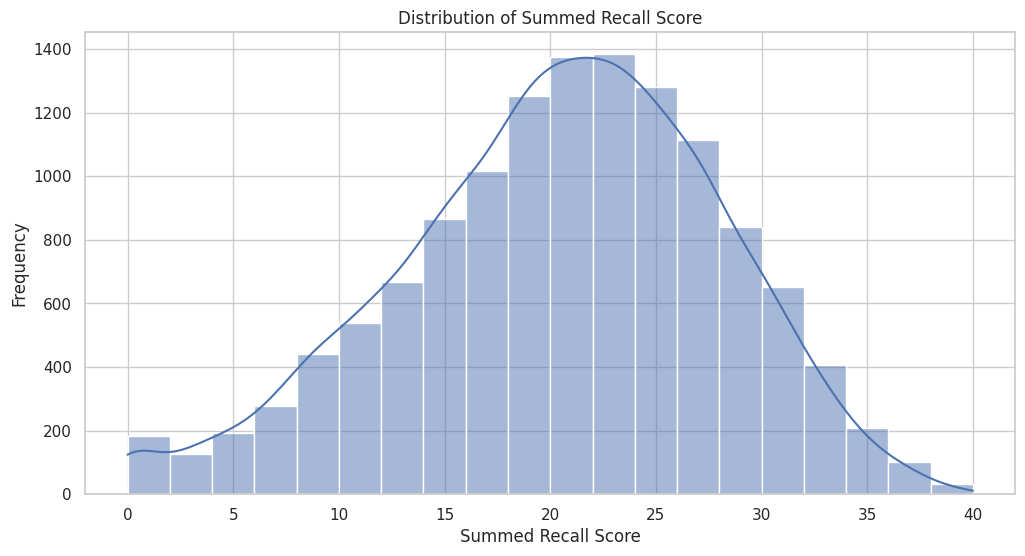

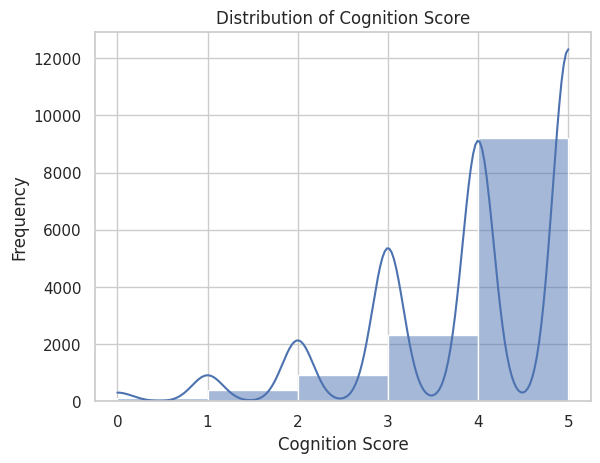

In [ ]:
sns.set(style="whitegrid")

# Plot the age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_final['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution last months average sleep hours
plt.figure(figsize=(12, 6))
sns.histplot(df_final['During Last Month Average Hours of Actual Sleep'], kde=True, bins=20)
plt.title('Distribution of Average Hours of Actual Sleep')
plt.xlabel('Average Hours of Actual Sleep')
plt.ylabel('Frequency')
plt.show()

# Plot the summed recall distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_final['Summed Recall Score'], kde=True, bins=20)
plt.title('Distribution of Summed Recall Score')
plt.xlabel('Summed Recall Score')
plt.ylabel('Frequency')

# Plot the Cognition score distribution
plt.figure()
sns.histplot(df_final['Cognition Score'], kde=True, bins=5)
plt.title('Distribution of Cognition Score')
plt.xlabel('Cognition Score')
plt.ylabel('Frequency')

The age distribution graph shows that most participants are between 50 and 70 years old, with a peak around 60. The sleep duration distribution indicates that most people sleep between 5 and 7 hours, though some extreme cases show very little or excessive sleep. The summed recall score follows a roughly normal distribution, suggesting that memory performance varies but centers around a common range. The cognition scores are skewed toward the higher end, suggesting that most participants maintain decent cognitive function. There are a few extreme cases in sleep and recall scores that stand out, which might be worth a closer look.

The age distribution skews right, so we grouped participants into cohorts with a 10 year range. The distribution is shown below.

<ipython-input-37-8771a88305b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


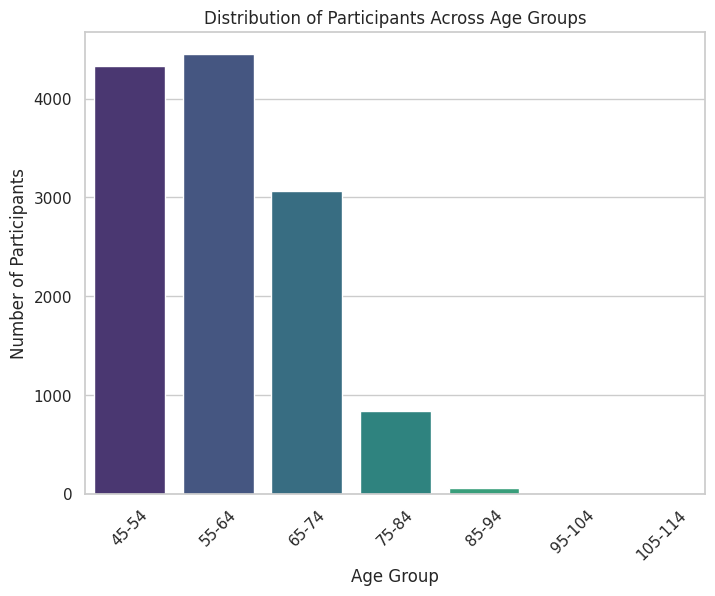

In [ ]:
# Participants in each age group
age_group_counts = df_final['Age Group'].value_counts()

# Bar plot distribution of participants across age groups
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Distribution of Participants Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()

The majority of participants are within the age range 45-65 while there is only one participant who is 108 years old. We will have to take the variability into consideration from these.

# Checking for Outliers

To identify potential outliers in the Average Hours of Actual Sleep and Summed Recall Score, we can use boxplots.

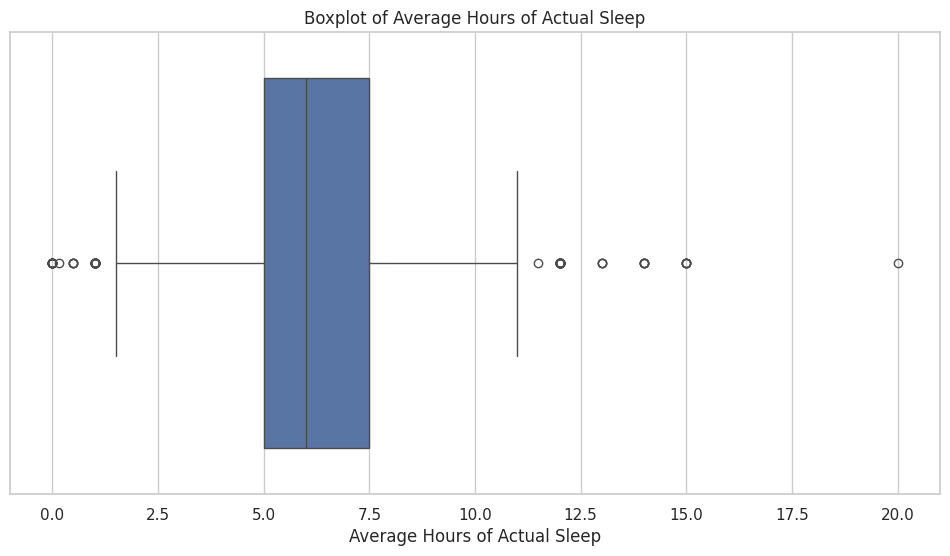

Text(0.5, 0, 'Cognition Score')

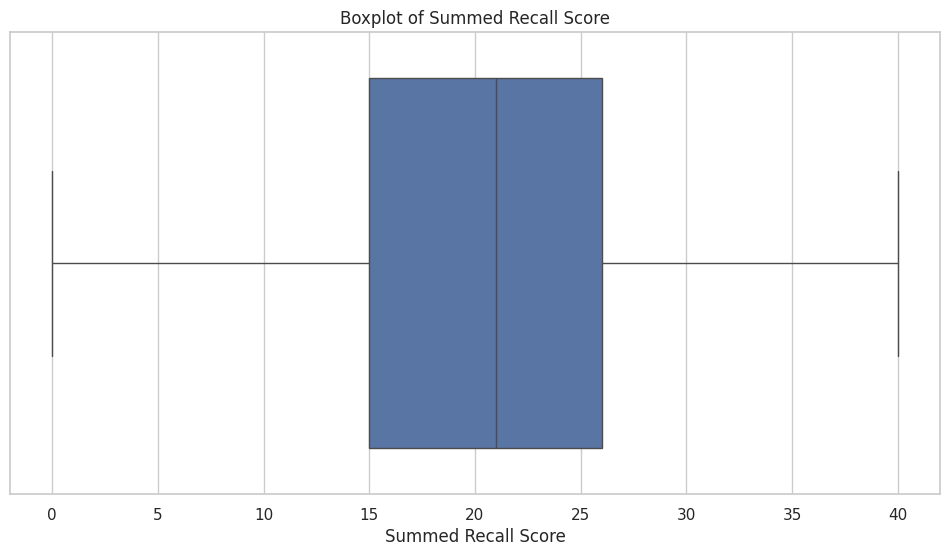

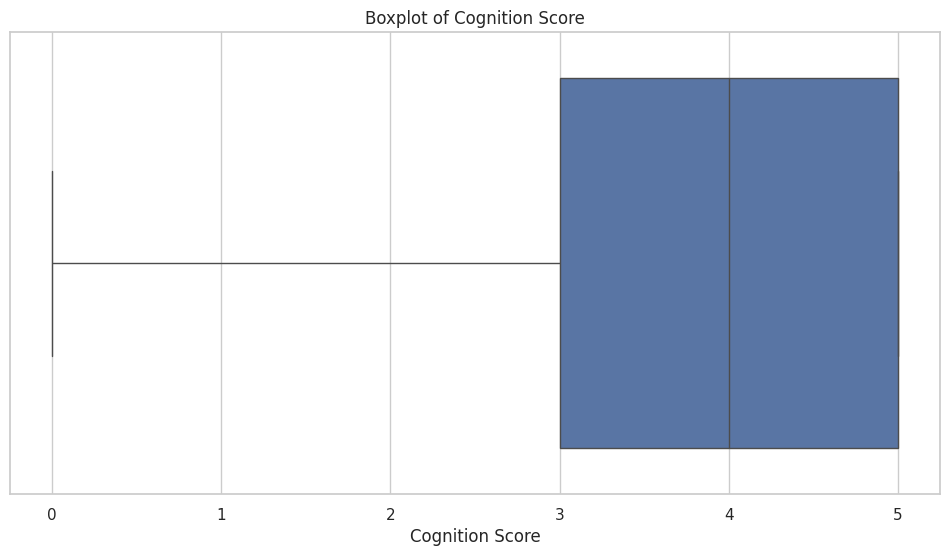

In [ ]:
# Boxplot for 'Average Hours of Actual Sleep'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['During Last Month Average Hours of Actual Sleep'])
plt.title('Boxplot of Average Hours of Actual Sleep')
plt.xlabel('Average Hours of Actual Sleep')
plt.show()

# Boxplot for 'Summed Recall Score'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['Summed Recall Score'])
plt.title('Boxplot of Summed Recall Score')
plt.xlabel('Summed Recall Score')

# Boxplot for 'Cognition Data'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['Cognition Score'])
plt.title('Boxplot of Cognition Score')
plt.xlabel('Cognition Score')

We see that for the average hours of actual sleep, we have several datapoints outside the IQR. We will have to identify those points. We will consider removing outliers such as participants who said they get 0 hours of sleep on average or 20 hours of sleep on average when all other participants fall between the 1 to 15 range.



In [ ]:
# Calculate Q1, Q3, and IQR
Q1_sleep = df_final['During Last Month Average Hours of Actual Sleep'].quantile(0.25)
Q3_sleep = df_final['During Last Month Average Hours of Actual Sleep'].quantile(0.75)
IQR_sleep = Q3_sleep - Q1_sleep

# Define lower and upper bounds
lower_bound_sleep = Q1_sleep - 1.5 * IQR_sleep
upper_bound_sleep = Q3_sleep + 1.5 * IQR_sleep

# Identify datapoints outside of the IQR
outsideIQR_sleep = df_final[(df_final['During Last Month Average Hours of Actual Sleep'] < lower_bound_sleep) |
                          (df_final['During Last Month Average Hours of Actual Sleep'] > upper_bound_sleep)]

print(f'Number of datapoints outside of IQR in Average Hours of Actual Sleep: {len(outsideIQR_sleep)}')
outsideIQR_sleep

Number of datapoints outside of IQR in Average Hours of Actual Sleep: 111


,ID,Gender,Year of Birth,Month of Birth,Day of Birth,Age,During Last Month Average Hours of Actual Sleep,During Last Month Time for a Nap after Lunch,householdID,communityID,...,Delayed Recall: Cabin Binary,Total Delayed Recall Score,Summed Recall Score,Age Group,Checking Season Binary,Checking Date Binary,Checking Day Binary,Checking Month Binary,Checking Year Binary,Cognition Score
83,194037314001,1 Male,1959.0,11.0,15.0,58.0,12.00,60.0,1940373140,1940373,...,0,0,5,55-64,1.0,1.0,1.0,1.0,NaN,4.0
234,064033324001,2 Female,1953.0,5.0,8.0,65.0,1.00,30.0,0640333240,0640333,...,0,1,4,65-74,0.0,0.0,0.0,0.0,0.0,0.0
637,060440111001,1 Male,1945.0,4.0,17.0,73.0,12.00,60.0,0604401110,0604401,...,1,1,11,65-74,0.0,0.0,0.0,1.0,1.0,2.0
1477,177402319002,2 Female,1947.0,6.0,2.0,71.0,1.00,0.0,1774023190,1774023,...,0,1,13,65-74,1.0,0.0,1.0,1.0,1.0,4.0
1807,105381322001,2 Female,1945.0,7.0,18.0,73.0,0.16,0.0,1053813220,1053813,...,0,0,4,65-74,1.0,1.0,0.0,1.0,0.0,3.0
2021,108259206003,1 Male,1973.0,3.0,25.0,45.0,12.00,60.0,1082592060,1082592,...,1,2,22,45-54,1.0,1.0,0.0,0.0,1.0,3.0
2100,108206240002,1 Male,1970.0,7.0,14.0,48.0,12.00,2.0,1082062400,1082062,...,1,5,22,45-54,1.0,NaN,NaN,1.0,1.0,3.0
2212,108206324002,2 Female,1952.0,2.0,9.0,66.0,1.00,60.0,1082063240,1082063,...,0,3,12,65-74,1.0,0.0,1.0,1.0,0.0,3.0
2515,101791251001,2 Female,1941.0,2.0,20.0,77.0,1.00,10.0,1017912510,1017912,...,0,3,18,75-84,1.0,1.0,0.0,1.0,0.0,3.0
2618,162431210002,1 Male,1948.0,1.0,1.0,70.0,12.00,60.0,1624312100,1624312,...,0,3,13,65-74,1.0,1.0,0.0,1.0,1.0,4.0


As shown, there are 111 datapoints outside the IQR. Since having more than 0 hours of sleep is realistic, we will not omit the datapoints greater than 0hrs. Nonetheless, there is one data data point at 20 hr of sleep. We believe this is not a reasonable average sleep duration over an entire month; therefore, this datapoint is also omitted.

In [ ]:
df_final = df_final[(df_final['During Last Month Average Hours of Actual Sleep'] != 0) &
                             (df_final['During Last Month Average Hours of Actual Sleep'] != 20)]

Now we want to see the boxplot again, after filtering out those outliers.

Text(0.5, 0, 'Average Hours of Actual Sleep')

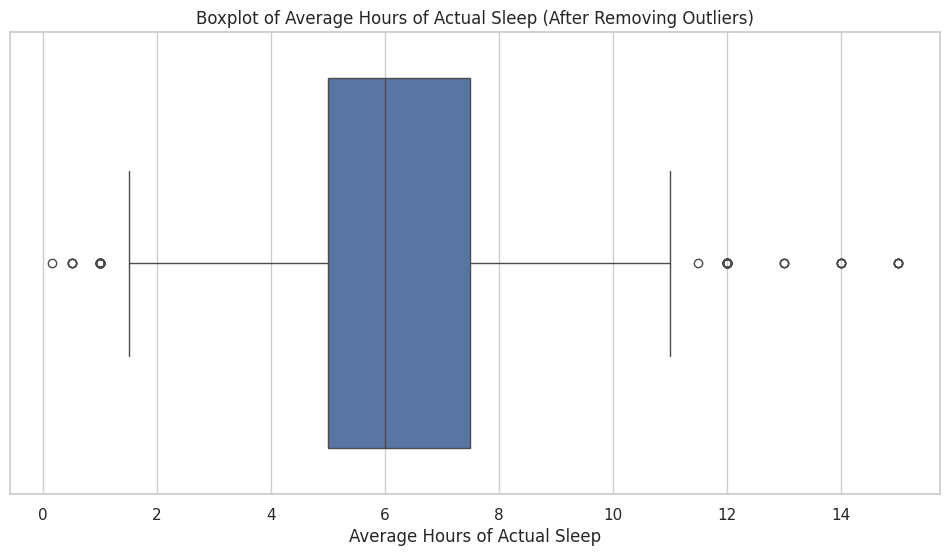

In [ ]:
# Making a new box plot of average hours of sleep without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['During Last Month Average Hours of Actual Sleep'])
plt.title('Boxplot of Average Hours of Actual Sleep (After Removing Outliers)')
plt.xlabel('Average Hours of Actual Sleep')

This boxplot shows the distribution of average sleep hours after filtering out extreme outliers. Most participants sleep between 5 to 8 hours, with a median around 6 hours. The whiskers extend from about 2 to 10 hours, capturing the typical range. A few outliers remain, with some reporting as little as 1-2 hours or as much as 12-14 hours of sleep.

# Relationship Between Variables

**General Relationship between Age, Recall/Memory ability and Sleep duration**

We want to first get a general sense of the relationship between the three main variables of our research question.

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Summed Recall Score', ylabel='Age'>,
        <Axes: xlabel='Cognition Score', ylabel='Age'>,
        <Axes: xlabel='During Last Month Average Hours of Actual Sleep', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Summed Recall Score'>,
        <Axes: xlabel='Summed Recall Score', ylabel='Summed Recall Score'>,
        <Axes: xlabel='Cognition Score', ylabel='Summed Recall Score'>,
        <Axes: xlabel='During Last Month Average Hours of Actual Sleep', ylabel='Summed Recall Score'>],
       [<Axes: xlabel='Age', ylabel='Cognition Score'>,
        <Axes: xlabel='Summed Recall Score', ylabel='Cognition Score'>,
        <Axes: xlabel='Cognition Score', ylabel='Cognition Score'>,
        <Axes: xlabel='During Last Month Average Hours of Actual Sleep', ylabel='Cognition Score'>],
       [<Axes: xlabel='Age', ylabel='During Last Month Average Hours of Actual Sleep'>,
        <Axes: xlabel='Summed Recall Score', ylabel='

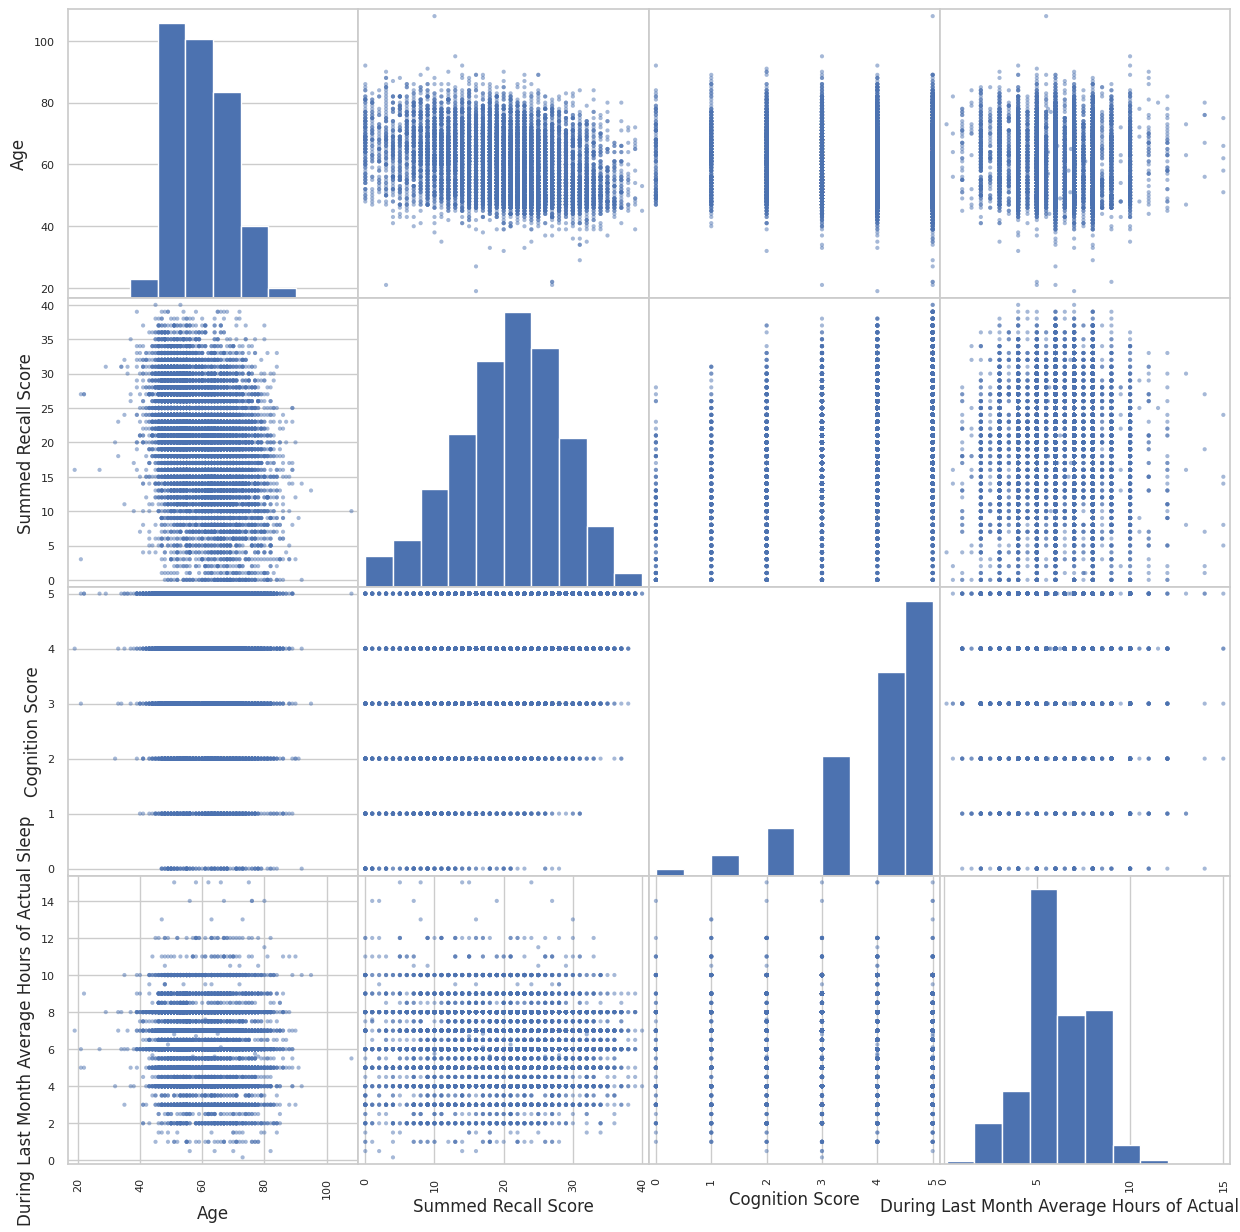

In [ ]:
columns = ['Age', 'Summed Recall Score', 'Cognition Score', 'During Last Month Average Hours of Actual Sleep']
scatter_matrix(df_final[columns], figsize=(15, 15))

The scatter matrix provides an overview of relationships between age, sleep duration, summed recall score, and cognition score. Age and recall scores appear to have a slight negative trend, suggesting memory performance may decline with age. Sleep duration does not show a strong visible correlation with recall or cognition scores, though extreme values are present. Cognition scores are skewed towards higher values, indicating most participants perform well in cognitive tests. The distribution of summed recall scores follows a normal-like pattern, while sleep duration is more concentrated around 5-7 hours. Overall, the chart hints at some trends, but we’d need deeper analysis to really understand the relationships.

**General Relationship between Recall/Memory Ability and Sleep Duration**

Text(0.5, 1.0, 'Summed Recall Score vs. Average Hours of Actual Sleep')

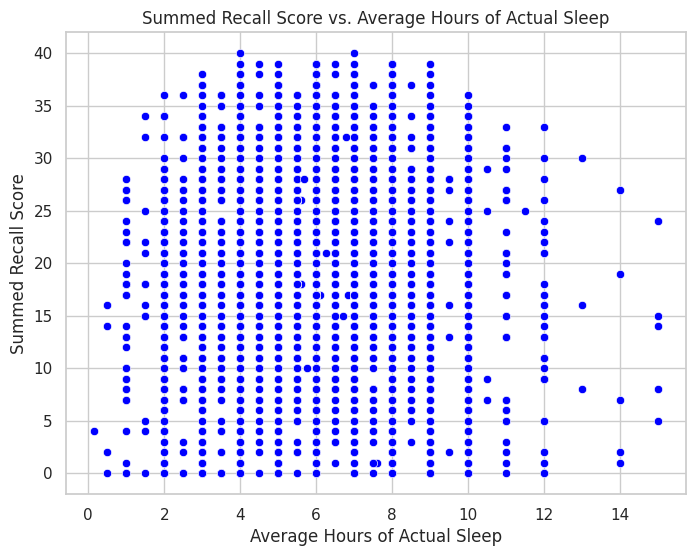

In [ ]:
# Making sure that the 'During Last Month Average Hours of Actual Sleep' and 'Summed Recall Score' columns are numerical
df_final['During Last Month Average Hours of Actual Sleep'] = pd.to_numeric(df_final['During Last Month Average Hours of Actual Sleep'], errors='coerce')
df_final['Summed Recall Score'] = pd.to_numeric(df_final['Summed Recall Score'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='During Last Month Average Hours of Actual Sleep',
                y='Summed Recall Score',
                data=df_final,
                color='blue')

plt.xlabel('Average Hours of Actual Sleep')
plt.ylabel('Summed Recall Score')
plt.title('Summed Recall Score vs. Average Hours of Actual Sleep')

This graph allows us to visualize the raw data. Now, we want to examine the recall score corresponding to the person with the maximum hours of sleep.

In [ ]:
# Find the row with the maximum hours of sleep
max_sleep_row = df_final.loc[df_final['During Last Month Average Hours of Actual Sleep'].idxmax()]

# Get the maximum sleep hours and the corresponding recall score
max_sleep_hours = max_sleep_row['During Last Month Average Hours of Actual Sleep']
max_recall_score = max_sleep_row['Summed Recall Score']

# Print the person with the most sleep and their recall score
print(f"Person with maximum sleep hours ({max_sleep_hours} hours) has a recall score of: {max_recall_score}")

Person with maximum sleep hours (15.0 hours) has a recall score of: 15


We notice that there is a high recall score with the highest number of sleep hours which suggests a positive correlation between sleep and recall.

Now, we want to examine the recall score corresponding to the person with the minimum hours of sleep.

In [ ]:
# Find the row with the minimum hours of sleep
min_sleep_row = df_final.loc[df_final['During Last Month Average Hours of Actual Sleep'].idxmin()]

# Get the minimum sleep hours and the corresponding recall score
min_sleep_hours = min_sleep_row['During Last Month Average Hours of Actual Sleep']
min_recall_score = min_sleep_row['Summed Recall Score']

# Print the person with the least sleep and their recall score
print(f"Person with minimum sleep hours ({min_sleep_hours} hours) has a recall score of: {min_recall_score}")

Person with minimum sleep hours (0.1599999964237213 hours) has a recall score of: 4


We notice that there is a low recall score with the lowest number of sleep hours which suggests a negative correlation between sleep and recall.

In [ ]:
# Find the minimum sleep hours
min_sleep_hours = df_final['During Last Month Average Hours of Actual Sleep'].min()

# Get the rows where the sleep hours are equal to the minimum
min_sleep_rows = df_final[df_final['During Last Month Average Hours of Actual Sleep'] == min_sleep_hours]

# Count how many people have the minimum sleep hours
num_min_sleep_people = min_sleep_rows.shape[0]

print(f"Number of people with the minimum sleep hours ({min_sleep_hours} hours): {num_min_sleep_people}")


Number of people with the minimum sleep hours (0.1599999964237213 hours): 1


Next, we are particularly interested in the relationship between sleep duration and recall ability across different age groups specifically.

**Relationship between Recall/Memory ability and Sleep duration across age groups**

Using the age groups we created (starting at 45, with a 10-year age range), we will visualize the relationship at different age groups.

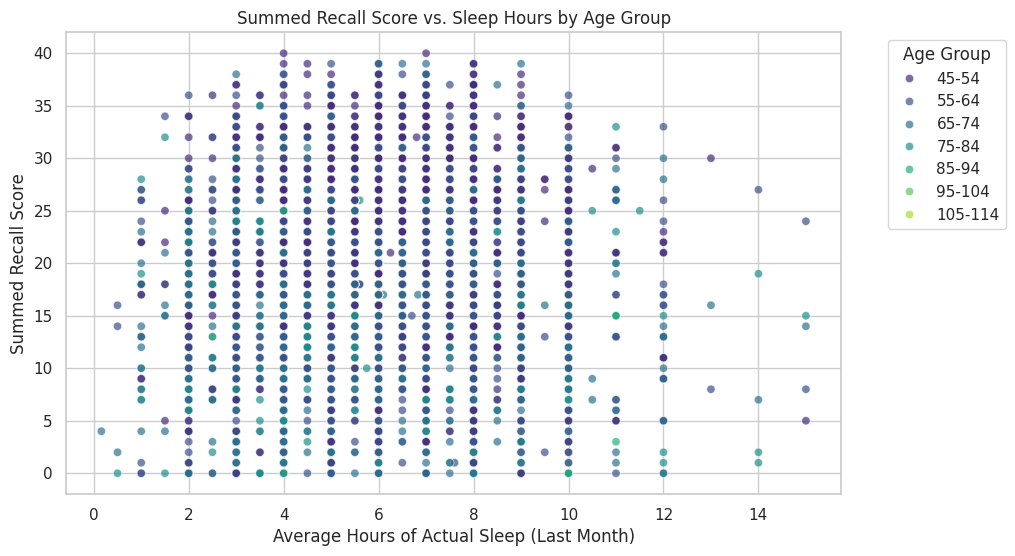

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final,
                x='During Last Month Average Hours of Actual Sleep',
                y='Summed Recall Score',
                hue='Age Group',
                palette='viridis',
                alpha=0.7)
plt.title('Summed Recall Score vs. Sleep Hours by Age Group')
plt.xlabel('Average Hours of Actual Sleep (Last Month)')
plt.ylabel('Summed Recall Score')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Since the data seem to be distributed all over the place, within each group, we will compute the average sleep duration and average recall score for each group, and visualize the relationship at different age groups.

<ipython-input-48-ce2f4d6d1350>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_final.groupby('Age Group')[['During Last Month Average Hours of Actual Sleep', 'Summed Recall Score']].mean().reset_index()


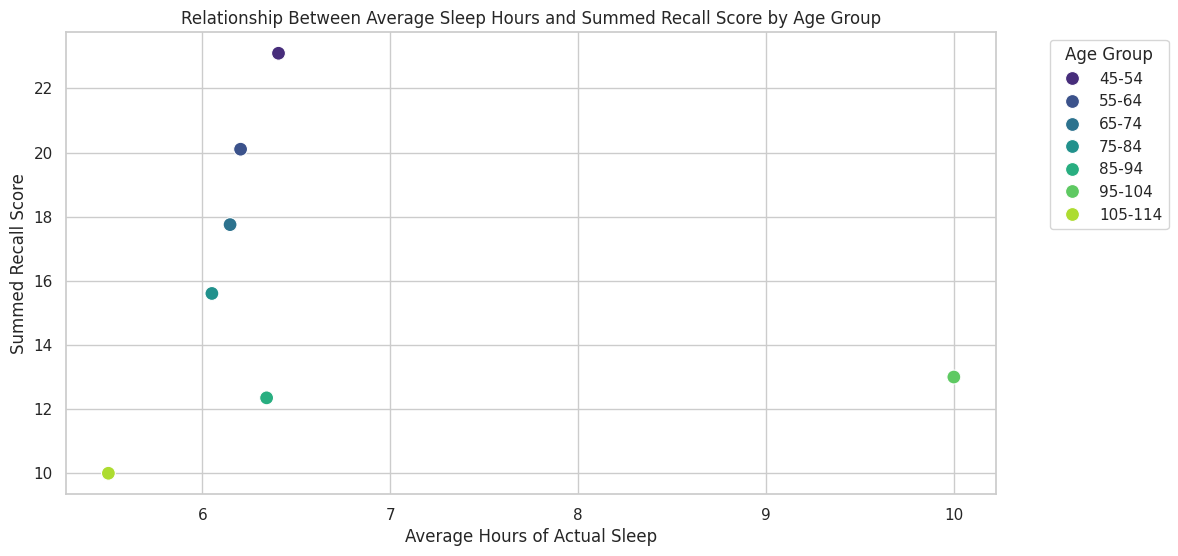

In [ ]:
# Group by age group and calculate the average sleep hours and summed recall score
age_group_stats = df_final.groupby('Age Group')[['During Last Month Average Hours of Actual Sleep', 'Summed Recall Score']].mean().reset_index()

# Plot the relationship between average sleep hours and summed recall score for each age group
plt.figure(figsize=(12, 6))
sns.scatterplot(data=age_group_stats, x='During Last Month Average Hours of Actual Sleep', y='Summed Recall Score', hue='Age Group', palette='viridis', s=100)
plt.title('Relationship Between Average Sleep Hours and Summed Recall Score by Age Group')
plt.xlabel('Average Hours of Actual Sleep')
plt.ylabel('Summed Recall Score')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

There is a decline in cognitive recall ability with age, and this graph shows a potential for the decline to be linked with sleep patterns. Sleeping more than 8 hours does not result in higher recall scores, especially in older individuals. Younger age groups seem to maintain a balance between sleep and cognitive function, with an optimal recal performance around 6 hours of sleep. More research would be needed to further understand the relationship between sleep duration and cognitive performance.  

**Relationship between times of recall and sleep duration**

Since the recall scores were summed from different recall tests at different times (1st, 2nd, 3rd and delayed), we also want to see if the time of recall exhibit different patterns with regard to sleep duration. For the immediate recall test, participants were shown a list of 10 words then asked to recall them immediately after shown. The first immediate recall test was done immediately, and the delayed recall test happened 5 minutes after. Then, the immediate recall test was performed two more times, after 5 minutes and after 30 minutes.

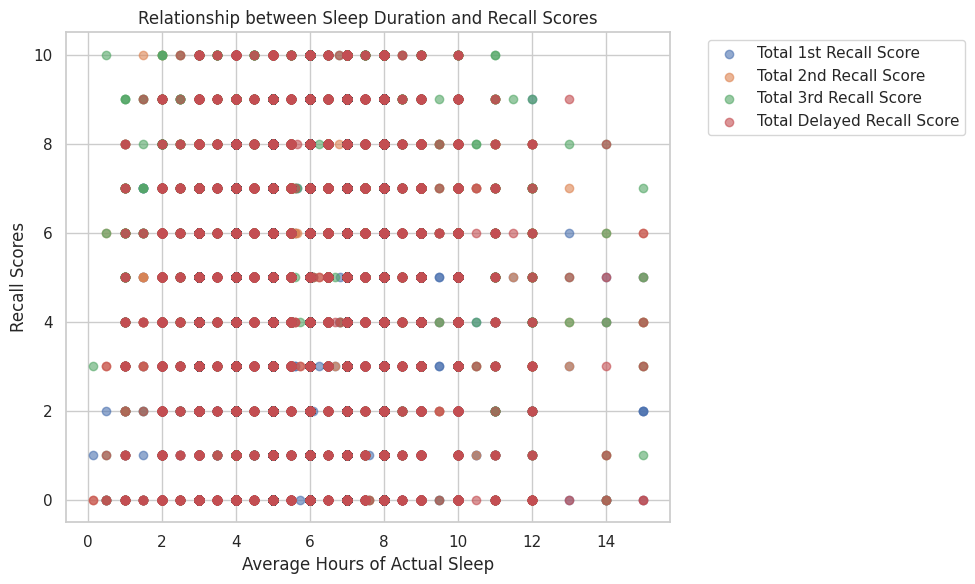

In [ ]:
recall_columns = ['Total 1st Recall Score', 'Total 2nd Recall Score',
                  'Total 3rd Recall Score', 'Total Delayed Recall Score']

plt.figure(figsize=(10, 6))

for recall_column in recall_columns:
    plt.scatter(df_final['During Last Month Average Hours of Actual Sleep'],
                df_final[recall_column], alpha=0.6, label=recall_column)

plt.title('Relationship between Sleep Duration and Recall Scores')
plt.xlabel('Average Hours of Actual Sleep')
plt.ylabel('Recall Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Since the response isn't on a continuous scale (in discrete integers intervals), a lot of datapoints are overalapping. We want to average the data points within the same Average Hours of Actual Sleep categorized by different recall tests.

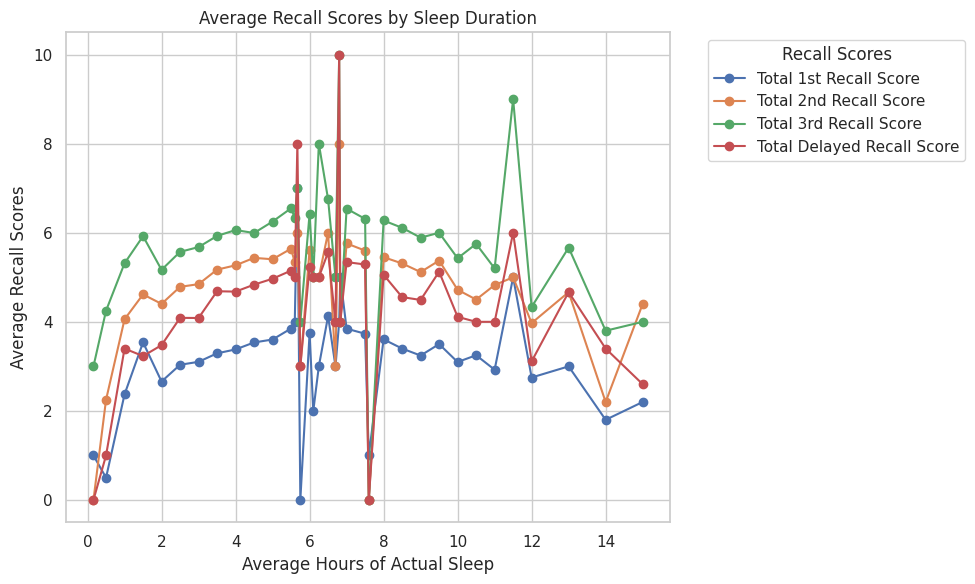

In [ ]:
# Group 'During Last Month Average Hours of Actual Sleep' and calculate average each recall score
df_avg_recall = df_final.groupby('During Last Month Average Hours of Actual Sleep')[recall_columns].mean().reset_index()

# Plot the average recall scores for each category of average hours of sleep
plt.figure(figsize=(10, 6))

# Loop through each recall score column and plot the data
for recall_column in recall_columns:
    plt.plot(df_avg_recall['During Last Month Average Hours of Actual Sleep'],
             df_avg_recall[recall_column], label=recall_column, marker='o')

plt.title('Average Recall Scores by Sleep Duration')
plt.xlabel('Average Hours of Actual Sleep')
plt.ylabel('Average Recall Scores')
plt.legend(title='Recall Scores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Optimal sleep duration for memory recall appears to be around 6 to 8 hours. Longer sleep durations (above 10 hours) do not show a clear benefit and may introduce more variability in recall performance. Short sleep durations (between 0-3 hours) lead to significantly lower recall scores, reinforcing the importance of sufficient sleep for memory function. The learning effect is evident in this graph, as recall performance improves across multiple attempts, with the third recall consistently being the highest.

There also appears to be a significant outlier in the data at roughly 7.5 hours of sleep, where the recall score drops to 0. This does not follow the trend of most other recall scores that are relatively stable between 4 and 7.

**General Relationship between Cognition Score and Average Hours of Sleep.**

In [ ]:
print(df_final['During Last Month Average Hours of Actual Sleep'])

0         8.00
1         5.00
2         5.00
4         8.00
5         7.00
7         6.00
8         5.50
9         5.00
10        7.00
11        6.00
12        6.00
13        6.00
15        7.00
16        5.00
17        6.00
18        4.00
19        5.00
20        6.00
21        6.00
22        6.00
23        8.50
24        7.00
25        6.00
26        7.00
27        6.00
28        6.00
29        7.00
30        6.00
31        6.00
33        7.00
34        6.00
35        5.00
36        6.00
38        5.50
39        6.00
40        5.00
41        6.00
42        6.00
44        5.00
45        7.00
48        7.50
49        5.50
50        6.00
52        7.00
53        5.00
56        6.00
57        6.00
58        7.00
59        6.00
60        6.00
61        6.00
62        5.00
63        5.00
68        8.00
72        5.00
73        7.00
74        6.00
75        6.00
78        7.00
79        6.00
81        7.00
83       12.00
84        7.00
86        8.00
90        6.00
91        7.50
92        

<ipython-input-52-c64224134e24>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_final['During Last Month Average Hours of Actual Sleep'],


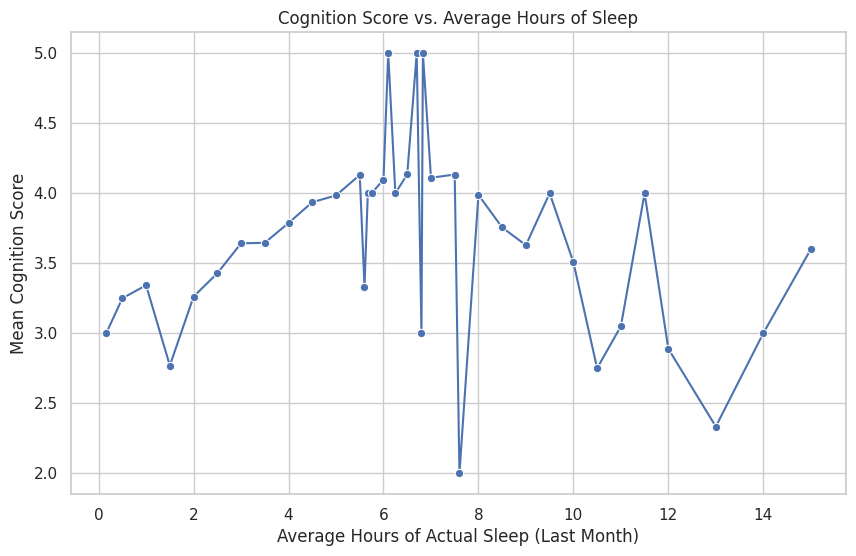

In [ ]:
# Lineplot plot average hours of actual sleep with respect to cognition score
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_final['During Last Month Average Hours of Actual Sleep'],
             y=df_final['Cognition Score'],
             estimator='mean', ci=None, marker='o')
plt.xlabel("Average Hours of Actual Sleep (Last Month)")
plt.ylabel("Mean Cognition Score")
plt.title("Cognition Score vs. Average Hours of Sleep")
plt.grid(True)

This graph examines the relationship between the average hours of sleep and mean cognition score, based on the orientation MMSE tests. Optimal cognitive performance is associated with 6-7 hours of sleep. Very short sleep (less than 3 hours) and excessive sleep (greater than 10 hours) correlate with lower cognition scores. The drop at 7.5 hours may be the same outlier as seen in the graph above, due to health conditions or possible mistakes in data input. Further analysis that show the effect of concentration of participants could help understand this variability in cognition scores.

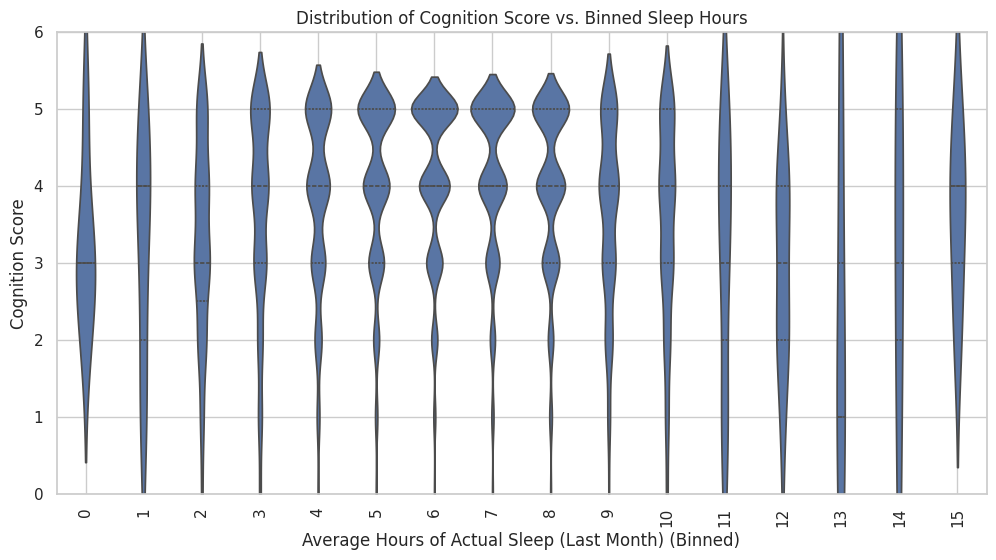

In [ ]:
# Violin Plot for Cognition Score vs Sleep Hours

df_final['Sleep Binned'] = np.floor(df_final['During Last Month Average Hours of Actual Sleep'])
plt.figure(figsize=(12, 6))
sns.violinplot(x=df_final['Sleep Binned'].astype(int),  # Ensure x-axis labels are integers
               y=df_final['Cognition Score'], inner="quartile")
plt.xticks(rotation=90)
plt.ylim(0, 6)
plt.xlabel("Average Hours of Actual Sleep (Last Month) (Binned)")
plt.ylabel("Cognition Score")
plt.title("Distribution of Cognition Score vs. Binned Sleep Hours")
plt.grid(True)
plt.show()

In the line graph above, a single outlier caused a big fluctuation, misleading the interpretation of overall trends. The violin plot provides deeper insights into the distribution and concentration of data points. The wider, denser region of high cognition scores around 6-7 hours confirms that moderate sleep durations result in the best cognitive performance. We can confirm the outlier at 7.5 hours because it appears as a thin tail, rather than distorting the entire trend. The longer sleep durations show more variability in cognition scores, resulting in an even, spread out violin plot at those hours.

**Relationship between Average Recall and Cognition Scores**

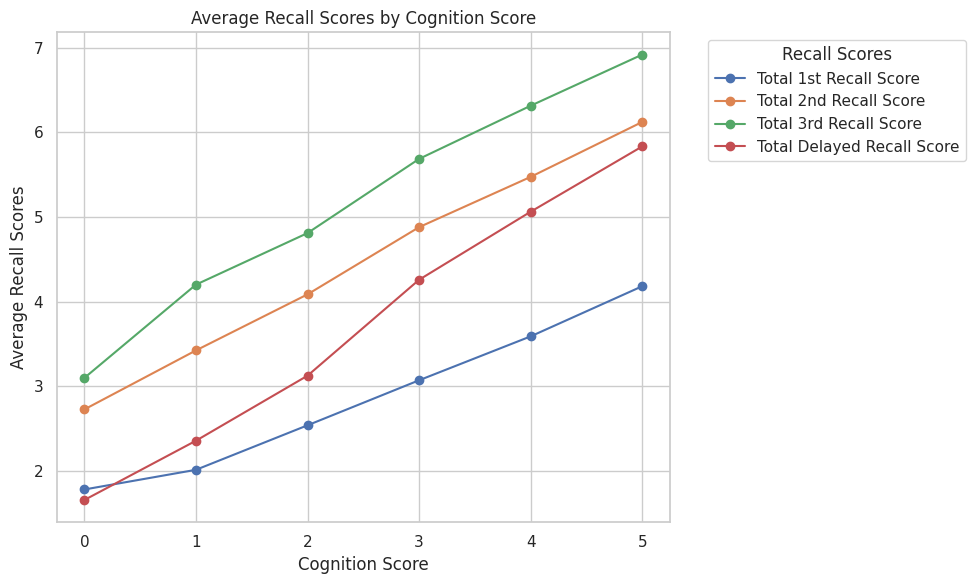

In [ ]:
# Group 'During Last Month Average Hours of Actual Sleep' and calculate average each recall score
df_avg_recall = df_final.groupby('Cognition Score')[recall_columns].mean().reset_index()

# Plot the average recall scores for each category of average hours of sleep
plt.figure(figsize=(10, 6))

# Loop through each recall score column and plot the data
for recall_column in recall_columns:
    plt.plot(df_avg_recall['Cognition Score'],
             df_avg_recall[recall_column], label=recall_column, marker='o')

plt.title('Average Recall Scores by Cognition Score')
plt.xlabel('Cognition Score')
plt.ylabel('Average Recall Scores')
plt.legend(title='Recall Scores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Higher cognition scores correlate with better recall scores across all categories. All lines have a positive slope. The steepest line (3rd recall) rises the fastest followed by the 2nd recall, then delayed recall, with 1st recall being the least sleep but still increasing. While individuals with higher cognition scores may improve more efficiently, the upward trend across all cognition levels shows that repetition strengthens memory for everyone.